### Sentiment Analyzer of Yelp Reviews

The dataset consists of positive and negative reviews in 2 CSV files; positivedata.csv and negativedata.csv.
The csv files were text files and there were no tags of whether the review was positive or negative.

### First attempt at building the sentiment analyzer

In [1]:
import pandas as pd
import numpy as np

In [2]:
## load the positive reviews data and remove some of the empty lines of data

with open('positivedata.csv', 'rU') as f:
    file1 = [row for row in f]
    file1 = map(lambda s: s.strip(), file1)
    file1 = filter(None, file1)

In [3]:
## place data in a dataframe and insert the column headings and sentiment tag (1 for positive)

pos_data_df = pd.DataFrame(file1)
pos_data_df.columns = ["reviews"]
pos_data_df.insert(0, "sentiment", 1)

In [4]:
pos_data_df.shape

(2264, 2)

In [5]:
pos_data_df.head()

,sentiment,reviews
0,1,"﻿""Excellent food. Superb customer service. I m..."
1,1,Yes this place is a little out dated and not o...
2,1,"""All the food is great here. But the best thin..."
3,1,"""The dining area is nice. Very family friendly..."
4,1,I highly recommend this place. The mechanics a...


In [6]:
## do similar for negative reviews
with open('negativedata.csv', 'rU') as g:
    file2 = [row for row in g]
    file2 = map(lambda s: s.strip(), file2)
    file2 = filter(None, file2)

In [7]:
# place in dataframe and tag negative sentiment as 0
neg_data_df = pd.DataFrame(file2)
neg_data_df.columns = ["reviews"]
neg_data_df.insert(0, "sentiment", 0)

In [8]:
neg_data_df.shape

(2376, 2)

In [9]:
neg_data_df.head()

,sentiment,reviews
0,0,"﻿""Wing sauce is like water. Pretty much a lot ..."
1,0,"""Owning a driving range inside the city limits..."
2,0,"Bottom line, this place sucks. The best hope ..."
3,0,"""This place is absolute garbage... Half of th..."
4,0,"""My fiancÃ© upgraded his phone at the Apple st..."


In [10]:
## combine the positive and negative reviews into a single dataframe
data = pos_data_df.append(neg_data_df)

In [11]:
## Count the labels in data to verify there are only 0 and 1
data.sentiment.value_counts()

0    2376
1    2264
Name: sentiment, dtype: int64

In [12]:
## How long is the average length of the reviews?
np.mean([len(s.split(" ")) for s in data.reviews])

56.073491379310347

In [13]:
import re, nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer

In [14]:
## define stemmer
stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

In [15]:
# define tokenizer
def tokenize(text):
    text = re.sub("[^a-zA-Z]", " ", text) #remove all except letters
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

In [16]:
vectorizer = CountVectorizer(
        analyzer = 'word',
        tokenizer = tokenize,
        lowercase = True,
        stop_words = 'english',
        max_features = 500)

In [17]:
# learn and fit the model/vectorizer and transform corpus into feature vectors

corpus_all_features = vectorizer.fit_transform(data.reviews.tolist())

In [18]:
# make corpus features a numpy array
corpus_all_features = corpus_all_features.toarray()

# print the features
features_corpus = vectorizer.get_feature_names()
print features_corpus

[u'abl', u'absolut', u'actual', u'adopt', u'ago', u'alreadi', u'alway', u'amaz', u'ani', u'anim', u'anoth', u'answer', u'anyon', u'anyth', u'apart', u'apolog', u'appet', u'appoint', u'area', u'arriv', u'ask', u'ate', u'atmospher', u'attent', u'attitud', u'avail', u'avoid', u'aw', u'away', u'awesom', u'bad', u'bar', u'bartend', u'base', u'basic', u'beauti', u'becaus', u'bed', u'beer', u'befor', u'believ', u'best', u'better', u'big', u'bike', u'birthday', u'bit', u'bite', u'bought', u'boyfriend', u'bread', u'breakfast', u'bring', u'brought', u'brunch', u'build', u'burger', u'busi', u'butter', u'buy', u'cake', u'came', u'car', u'card', u'care', u'casbah', u'cash', u'cat', u'chang', u'charg', u'cheap', u'check', u'chees', u'chef', u'chicken', u'chocol', u'choic', u'citi', u'class', u'clean', u'close', u'cloth', u'coffe', u'cold', u'come', u'comfort', u'compani', u'complain', u'complet', u'cook', u'cool', u'cost', u'couldn', u'counter', u'coupl', u'cours', u'cover', u'cream', u'crowd', u'cu

In [21]:
# check there are 500 features
len(features_corpus)

500

In [22]:
# find frequency of features in corpus_all_features
fdist_features = np.sum(corpus_all_features, axis=0)
for word, count in zip(features_corpus, fdist_features):
    print count, word

100 abl
116 absolut
171 actual
54 adopt
86 ago
64 alreadi
342 alway
190 amaz
308 ani
79 anim
285 anoth
59 answer
98 anyon
143 anyth
74 apart
53 apolog
94 appet
91 appoint
173 area
132 arriv
488 ask
71 ate
95 atmospher
57 attent
55 attitud
53 avail
56 avoid
89 aw
185 away
121 awesom
244 bad
247 bar
73 bartend
54 base
53 basic
60 beauti
475 becaus
51 bed
151 beer
309 befor
84 believ
397 best
262 better
144 big
85 bike
78 birthday
102 bit
55 bite
62 bought
55 boyfriend
193 bread
112 breakfast
105 bring
81 brought
62 brunch
70 build
68 burger
299 busi
60 butter
94 buy
130 cake
312 came
361 car
64 card
182 care
90 casbah
55 cash
90 cat
151 chang
128 charg
60 cheap
224 check
204 chees
78 chef
183 chicken
54 chocol
53 choic
76 citi
53 class
123 clean
114 close
60 cloth
209 coffe
130 cold
436 come
50 comfort
72 compani
65 complain
104 complet
131 cook
54 cool
78 cost
116 couldn
91 counter
94 coupl
68 cours
54 cover
77 cream
67 crowd
276 custom
109 cut
231 d
379 day
88 deal
64 decent
126 decid


In [24]:
# Training the data...
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        corpus_all_features, 
        data.sentiment,
        train_size=0.80,
        random_state=42)

/Users/Work/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
# Create the Log Regression classifier
from sklearn.linear_model import LogisticRegression

log_mod = LogisticRegression()
log_mod = log_mod.fit(X_train, y_train)

y_log_pred = log_mod.predict(X_test)

In [26]:
# find classifier precision
from sklearn.metrics import classification_report
print(classification_report(y_test, y_log_pred))

             precision    recall  f1-score   support

          0       0.79      0.81      0.80       468
          1       0.80      0.78      0.79       460

avg / total       0.79      0.79      0.79       928



The precision is the ratio `tp / (tp + fp)` where `tp` is the number of true positives and `fp` the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio `tp / (tp + fn)` where `tp` is the number of true positives and `fn` the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The f1-score can be interpreted as a weighted harmonic mean of the precision and recall, where an f1-score reaches its best value at 1 and worst score at 0.

The support is the number of occurrences of each class in `y_true`.

In [27]:
# print sample of predictions
for review, sentiment in zip(data.reviews[15:50], y_log_pred[15:50]):
    print sentiment, review

0 "-Shrimp a few ways (""""Norfolk"""" style is oily for my taste, and I never had it growing up in Norfolk.)"
0 -Hawkins St Special
1 "-Prime Rib (sized for two, watch it)"
0 "The prices are low, the portions are large, and just about everything on the menu  is delicious. I'm not one to pick a place because they give you a lot of food, but if you like a good value and don't want to compromise on taste, this place is a gem."""
1 "Old school.....traditional ""mom 'n pop"" quality and perfection. The best fish and chips you'll ever enjoy and equally superb fried shrimp. A great out of the way, non-corporate, vestige of Americana. You will love it."
0 Seen this restaurant on 25 best places in Pittsburgh with Rick Seback
1 "ack. Went there with my girlfriend she grew up with the owner. She's very nice all employees are super nice service was excellent i had the fish sandwich my girlfriend had the Ruben more than you could possibly eat very reasonable prices. Going back to try the burgers  

## Second attempt
### For the second attempt, the text is 'cleaned' before tagging them with the sentiment. Other classifiers are also used and the accuracy scores are compared.
Although I managed to get a copy of the yelp reviews data, multiple attempts at reading the json file resulted in the kernel failing and restarting, either due to the size of the dataset or the macbook was too slow and old to handle that much date. Or both. After all, the original datasets were used.

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk, re
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.stem import wordnet

### Included a Lemmatizer in the review_to_words function

In [30]:
## define a function to convert a raw review to a string of words

lemmer = wordnet.WordNetLemmatizer()
def review_to_words(raw):
    # Clean punctuation
    cleantext = raw.replace('/', ' ').replace('-', ' ').replace('"', '')
    # Remove quotation marks
    review_text = re.sub(r'^"|"$', '', cleantext)
    # Remove non-letters
    letters = re.sub("[^a-zA-Z]", " ", review_text)
    # Lower case and split into individual words
    words = letters.lower().split()
    # Convert stop words to a set
    stops = set(stopwords.words("english"))
    # Remove stop words
    relevant_words = [w for w in words if not w in stops]
    # lemmatize words
    lemmatized_words = [lemmer.lemmatize(w) for w in relevant_words]
    # Join words back into one string separated by space, return result
    return( " ".join([p for p in lemmatized_words]))

In [31]:
review_to_words(file1[0])

u'excellent food superb customer service miss mario machine used still great place steeped tradition'

In [32]:
review_to_words(file2[0])

u'wing sauce like water pretty much lot butter hot sauce frank red hot maybe whole wing good size crispy wing sauce could better hot extra hot flavor heat fish sandwich good large portion side decent'

In [33]:
# Clean the positive and negative reviews
num_pos_reviews = len(file1)
num_neg_reviews = len(file2)

print "Cleaning the set of positive reviews....\n"
# Initialize empty list to hold cleaned positive reviews
clean_pos_reviews = []
for i in xrange(1, num_pos_reviews):
    if ((i+1)%500 == 0):
        print "Review %d of %d\n" % (i+1, num_pos_reviews)
    clean_pos_reviews.append(review_to_words(file1[i]))

print "Cleaning the set of negative reviews....\n"
# Initialize empty list to hold cleaned negative reviews
clean_neg_reviews = []
for i in xrange(1, num_neg_reviews):
    if ((i+1)%500 == 0):
        print "Review %d of %d\n" % (i+1, num_neg_reviews)
    clean_neg_reviews.append(review_to_words(file2[i]))

Cleaning the set of positive reviews....

Review 500 of 2264

Review 1000 of 2264

Review 1500 of 2264

Review 2000 of 2264

Cleaning the set of negative reviews....

Review 500 of 2376

Review 1000 of 2376

Review 1500 of 2376

Review 2000 of 2376



In [34]:
# Create column headings and tag the positive reviews with sentiment 1
pos_data_df = pd.DataFrame(clean_pos_reviews)
pos_data_df.columns = ["reviews"]
pos_data_df.insert(0, "sentiment", 1)

# Create column headings and tag the negative reviews with sentiment 0
neg_data_df = pd.DataFrame(clean_neg_reviews)
neg_data_df.columns = ["reviews"]
neg_data_df.insert(0, "sentiment", 0)

In [35]:
pos_data_df.shape

(2263, 2)

In [36]:
pos_data_df.groupby('sentiment').describe()

reviews
sentiment                   
1         count         2263
          unique        2253
          top     love place
          freq             3

In [37]:
neg_data_df.shape

(2375, 2)

In [38]:
neg_data_df.groupby('sentiment').describe()

reviews
sentiment               
0         count     2375
          unique    2356
          top           
          freq         5

In [39]:
pos_data_df['length'] = pos_data_df['reviews'].map(lambda text: len(text))
print pos_data_df.head(10)

   sentiment                                            reviews  length
0          1  yes place little dated opened weekend staff al...     216
1          1  food great best thing wing wing simply fantast...     145
2          1  dining area nice family friendly bar nice well...     105
3          1  highly recommend place mechanic really honest ...      59
4          1  big believer first impression go new business ...     444
5          1  thank rob truly appreciated help received agen...     372
6          1  place delicious parent saw recommendation visi...     625
7          1            miss stop best fish sandwich pittsburgh      39
8          1              place lot review glad need get busier      37
9          1  age look ambiance bother pretend movie set pit...     281


In [40]:
print pos_data_df.tail(10)

      sentiment                                            reviews  length
2253          1  restaurant deserve star rating yelp star ratin...     236
2254          1  husband took year old daughter amazing experie...     251
2255          1  foody family gave gem portuguese mediterranean...     162
2256          1  despite bloody labor battle fought old homeste...     231
2257          1  begin tour helen frick art museum located reyn...     284
2258          1  next car carriage museum henry clay frick appa...     179
2259          1  move favorite greenhouse garden lawn believe a...     149
2260          1  finally come house clayton purchased princely ...     172
2261          1  stop frick complete without visiting cafe beli...     438
2262          1  forget tea wonderful service impeccable guest ...      74


In [41]:
neg_data_df['length'] = neg_data_df['reviews'].map(lambda text: len(text))
print neg_data_df.head(10)

   sentiment                                            reviews  length
0          0  owning driving range inside city limit like li...     569
1          0  bottom line place suck best hope owner sell so...     102
2          0  place absolute garbage half tee available incl...     285
3          0  fianc upgraded phone apple store got strange t...     362
4          0  waited min people ahead finally getting helped...      50
5          0  understand busy ridiculous work robinson went ...     165
6          0  go place scam come opening freezing canceling ...     161
7          0  used go tire brake etc price gone way mid leve...     205
8          0  got new tire within two week got flat took car...     179
9          0  took tire flynn told someone punctured tire tr...     154


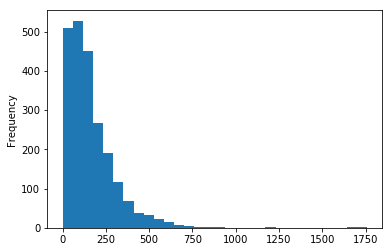

In [42]:
pos_data_df.length.plot(bins=30, kind='hist')

In [43]:
pos_data_df.length.describe()

count    2263.000000
mean      162.477684
std       142.250117
min         0.000000
25%        64.000000
50%       129.000000
75%       219.000000
max      1758.000000
Name: length, dtype: float64

In [47]:
## What is this review with 1786 words long?
print list(pos_data_df.reviews[pos_data_df.length > 1750])

[u'year ago lost partner love life tragic accident struggling horrific grief difficulty getting back life knew grief counselor suggested help something else order help feel better decided since animal lover would try volunteering animal shelter working lot time wanted shelter feel right visited good work one kept drawing back arl yes building old bit run stop staff administration best little best space saw bathroom renovated vet tech office saw janitor closet renovated made rodent room cat lived cage along hall arl new building next door old gas station made cat adoption center staff still young going year shelter place employment matter know something place right volunteer easily hour week arl get see good bad ugly tell first hand good staff executive director dan rossi work go animal staff know every one animal care keep door wide open domestic wild animal even mean staff member volunteer take cat dog home answer never ever animal also volunteer humane society united state travel aro

In [45]:
neg_data_df.length.describe()

count    2375.000000
mean      187.170947
std       179.614103
min         0.000000
25%        69.000000
50%       136.000000
75%       250.000000
max      1755.000000
Name: length, dtype: float64

In [48]:
## What is this negative review with 1786 words long?
print list(neg_data_df.reviews[neg_data_df.length > 1750])

[u'spoke man morning ice covered parking lot sidewalk business liable customer someone slip fall due negligence business part told good luck liable careful everywhere icy two year gym fed way treat customer told fed since gave hard time towel week ago towel since never clean parking lot winter make sure wear boot outside crash car aside gym well gym biggest critic aside rude management negligence would encourage sanitization outside cardio room towel spray around weight machine never issue hate see happen always make sure least wipe sweat mark machine cause well pretty nasty pretty large term size space anything aside ordinary weight cardio worker well mostly young really care much man told wrong older possibly manager owner tend keep top wash towel even busy pretty annoying cardio room always fox news two tv middle tv sport center regardless else tv recently even putting pen game stuff must busy watching inch screen lobby worker cardio room max middle side probably pay full price memb

In [49]:
# Combine 2 dataframes
data = pos_data_df.append(neg_data_df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x123abdfd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x123cf6ed0>], dtype=object)

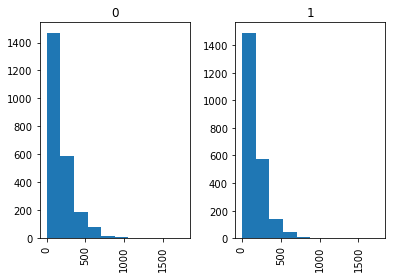

In [50]:
# Compare the histograms by sentiment
data.hist(column='length', by='sentiment', bins=10)

In [51]:
## Create the bag of words with 5000 features, with bi-grams

print "Creating the bag of words...\n"
from sklearn.feature_extraction.text import CountVectorizer
# Initialize CountVectorizer object
vectorizer = CountVectorizer(analyzer = 'word',     \
                             tokenizer = tokenize,      \
                             ngram_range = (1, 2), \
                             preprocessor = None,   \
                             stop_words = None,     \
                             max_features = 5000)

Creating the bag of words...



In [52]:
# learn and fit the model/vectorizer and transform corpus into feature vectors
corpus_all_features = vectorizer.fit_transform(data.reviews.tolist())

# make corpus features a numpy array
corpus_all_features = corpus_all_features.toarray()

# print the features
features_corpus = vectorizer.get_feature_names()
print features_corpus
len(features_corpus)

[u'aaa', u'aamco', u'abl', u'abl find', u'abl get', u'absolut', u'absolut best', u'absolut delici', u'absolut disgust', u'absolut favorit', u'absolut horribl', u'absolut love', u'absolut worst', u'accept', u'access', u'accid', u'accommod', u'accompani', u'accomplish', u'accord', u'account', u'accur', u'accus', u'ace', u'acknowledg', u'across', u'across countri', u'across street', u'act', u'act like', u'activ', u'actual', u'actual care', u'ad', u'add', u'addict', u'addit', u'address', u'adjust', u'admit', u'admittedli', u'adopt', u'ador', u'adult', u'advanc', u'advantag', u'adventur', u'advertis', u'advic', u'advis', u'afford', u'afraid', u'african', u'aftermarket', u'afternoon', u'afterward', u'age', u'aggress', u'ago', u'agre', u'agre review', u'ah', u'ahead', u'ahead time', u'ahi', u'ahi tuna', u'aioli', u'air', u'airport', u'al', u'ala', u'alcohol', u'alfredo', u'align', u'alik', u'allegheni', u'allergi', u'allow', u'almond', u'almost', u'almost hour', u'alon', u'along', u'alot', u'

5000

In [53]:
# Sum the counts of each feature word
dist = np.sum(corpus_all_features, axis=0)

# For each, print the vocabulary word and the number of times it appears in the features corpus
for tag, count in zip(features_corpus, dist):
    print count, tag

12 aaa
13 aamco
100 abl
5 abl find
14 abl get
116 absolut
5 absolut best
5 absolut delici
5 absolut disgust
5 absolut favorit
11 absolut horribl
7 absolut love
7 absolut worst
28 accept
11 access
15 accid
33 accommod
10 accompani
5 accomplish
11 accord
14 account
7 accur
6 accus
5 ace
21 acknowledg
46 across
5 across countri
18 across street
32 act
10 act like
12 activ
171 actual
5 actual care
39 ad
29 add
13 addict
29 addit
14 address
14 adjust
15 admit
5 admittedli
54 adopt
8 ador
20 adult
30 advanc
9 advantag
11 adventur
14 advertis
21 advic
9 advis
23 afford
8 afraid
6 african
6 aftermarket
38 afternoon
7 afterward
12 age
9 aggress
86 ago
27 agre
5 agre review
8 ah
46 ahead
8 ahead time
9 ahi
8 ahi tuna
6 aioli
18 air
14 airport
6 al
6 ala
12 alcohol
9 alfredo
5 align
6 alik
5 allegheni
14 allergi
35 allow
9 almond
102 almost
7 almost hour
31 alon
32 along
5 alot
64 alreadi
13 alright
452 also
5 also fantast
7 also get
9 also good
9 also got
10 also great
8 also like
7 also love
9 

8 dryer
30 duck
10 dude
51 due
6 duke
6 dumb
8 dump
10 dumpl
5 dun
5 duti
5 dvd
26 e
6 eager
37 eagl
6 ear
46 earli
15 earlier
13 earn
14 earth
7 eas
41 easi
7 easier
38 easili
61 east
34 east end
19 east liberti
307 eat
5 eat anyth
7 eat drink
7 eat food
13 eat n
63 eaten
8 eater
5 eclect
7 ed
11 edg
13 edibl
6 edimam
8 effect
14 effici
22 effort
72 egg
8 egg roll
16 eggplant
5 eh
71 either
7 either way
5 el
11 electr
11 elev
6 eleven
165 els
29 elsewher
5 em
27 email
14 embarrass
10 emerg
8 emil
6 emiss
99 employe
60 empti
8 empti tabl
18 encount
5 encourag
197 end
5 end day
12 end food
6 end get
6 end go
7 end meal
5 end order
8 energi
5 engag
14 engin
7 engin light
135 enjoy
6 enjoy meal
6 enorm
147 enough
5 enough make
5 enrico
7 ensur
21 enter
5 enterpris
12 entertain
6 enthusiast
85 entir
9 entir time
6 entr
6 entr e
8 entranc
86 entre
8 entre order
17 environ
15 equal
10 equip
5 er
7 error
84 especi
6 especi sinc
7 espn
29 espresso
9 essenti
39 establish
33 estim
56 etc
7 europ

12 hidden
7 hidden gem
78 high
5 high end
11 high price
11 high qualiti
6 high school
14 higher
7 highest
11 highland
10 highland park
93 highli
5 highli enough
5 highli rate
65 highli recommend
6 highli suggest
9 highlight
5 hilari
31 hill
11 hint
10 hip
4 hippi
17 hipster
17 hire
7 histor
7 histori
41 hit
7 hit miss
33 hoagi
5 hockey
42 hold
32 hole
10 hole wall
6 holi
20 holiday
6 holiday inn
190 home
9 home depot
11 home fri
5 home made
4 homefri
23 homemad
12 homestead
5 homey
53 honest
9 honesti
46 honestli
7 honey
14 honor
8 hood
7 hook
7 hop
76 hope
6 hope get
109 horribl
11 horribl experi
6 horribl food
19 horribl servic
5 horrifi
6 horror
8 hospit
17 host
61 hostess
5 hostess said
121 hot
6 hot dog
7 hot food
5 hot sauc
6 hot water
83 hotel
9 hotel room
283 hour
9 hour food
12 hour get
12 hour half
13 hour later
5 hour order
6 hour wait
78 hous
5 hous made
85 howev
5 hr
11 http
9 http www
8 hub
10 hubbi
84 huge
17 human
29 hummu
7 humor
11 hundr
14 hung
30 hungri
6 hunt
8 hur

6 overpow
43 overpr
6 overr
14 overwhelm
20 own
181 owner
5 owner came
5 owner staff
6 ownership
13 oyster
9 oz
24 p
45 pa
36 pack
7 packag
12 pad
6 page
54 paid
20 pain
37 paint
38 pair
5 palac
15 pan
18 pancak
9 panera
5 panini
22 pant
12 papa
10 papa j
35 paper
6 paperwork
19 par
16 parent
162 park
31 park lot
7 parm
5 parma
7 parmesan
113 part
5 part meal
114 parti
5 parti order
8 partial
5 particip
18 particular
18 particularli
9 partner
31 pass
6 passabl
7 passion
85 past
6 past saturday
11 past year
113 pasta
5 pasta dish
5 pasta salad
5 pasta trio
5 pastrami
30 pastri
5 pat
8 patch
5 pathet
8 patienc
33 patient
21 patio
22 patron
7 patti
19 paul
158 pay
7 pay bill
6 pay full
5 payment
7 pea
11 peanut
9 pedicur
5 pee
7 penguin
16 penn
11 penni
365 peopl
9 peopl come
5 peopl great
5 peopl know
9 peopl like
6 peopl wait
22 peopl work
7 peopl would
8 pep
8 pep boy
47 pepper
5 pepper chees
12 pepperoni
25 per
7 per person
104 perfect
5 perfect place
49 perfectli
6 perfectli cook
6 p

124 show
8 show u
12 shower
6 shred
74 shrimp
6 shrimp tempura
12 shut
6 shuttl
7 sicilian
34 sick
145 side
6 side dish
5 side fri
5 side note
5 side salad
7 sigh
6 sight
65 sign
5 sign leas
12 signatur
6 significantli
5 silli
19 similar
27 simpl
49 simpli
220 sinc
5 sinc food
5 sinc last
5 sinc place
5 sincer
25 sing
7 sing sing
36 singl
10 sink
9 sip
35 sister
140 sit
5 sit around
6 sit outsid
8 sit tabl
8 sit wait
17 site
47 situat
25 six
83 size
5 skeptic
11 skill
6 skim
6 skimpi
7 skin
20 skip
7 skirt
6 slack
7 slam
10 slaw
14 sleep
48 slice
8 slide
5 slider
18 slightli
6 slip
8 sloppi
51 slow
7 slow servic
138 small
5 small place
6 small portion
5 small town
10 smaller
6 smart
6 smear
49 smell
7 smell like
21 smile
9 smiley
32 smoke
10 smoke salmon
14 smooth
9 smoothi
8 snack
5 snap
8 snow
7 soak
9 soap
5 social
10 soda
11 soft
31 soggi
5 soho
23 sold
8 sole
15 solid
9 solut
6 somebodi
14 somehow
124 someon
4 someon came
14 someon els
4 someon take
6 someon would
185 someth
4 som

198 visit
5 visit famili
7 visit pittsburgh
5 visual
8 vodka
9 voic
7 voicemail
26 volunt
7 voucher
19 w
518 wait
17 wait anoth
5 wait bar
11 wait food
7 wait get
12 wait go
5 wait got
5 wait half
15 wait hour
7 wait line
12 wait long
10 wait min
43 wait minut
6 wait return
5 wait seat
26 wait staff
10 wait tabl
5 wait time
7 wait u
31 wait wait
85 waiter
8 waiter ask
189 waitress
6 waitress came
7 waitress come
5 waitress even
4 waitress nice
6 waitress said
4 waitress told
4 waitress walk
9 waitstaff
4 wake
4 walgreen
249 walk
11 walk around
22 walk away
10 walk back
6 walk distanc
10 walk door
5 walk past
6 walk place
4 walk restaur
7 walk store
66 wall
9 wallet
7 walnut
96 walter
10 walter automot
9 wan
8 wan na
8 wander
434 want
4 want anoth
6 want come
9 want eat
9 want get
6 want give
19 want go
6 want good
6 want know
9 want leav
10 want like
4 want look
8 want order
7 want pay
5 want place
4 want see
4 want sit
7 want someth
7 want take
12 want tri
5 wardrob
15 warehous
63 war

In [75]:
# Test with LogRegression classifier to see if increase in features raises scores

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        corpus_all_features, 
        data.sentiment,
        test_size=0.2,
        random_state=42)

In [76]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Create the Log Regression classifier
from sklearn.linear_model import LogisticRegression

log_mod = LogisticRegression(penalty='l2', C=1.0)
log_mod = log_mod.fit(X_train, y_train)

y_log_pred = log_mod.predict(X_test)

# find classifier precision
from sklearn.metrics import classification_report
print(classification_report(y_test, y_log_pred))

             precision    recall  f1-score   support

          0       0.83      0.84      0.84       460
          1       0.84      0.83      0.84       468

avg / total       0.84      0.84      0.84       928



In [77]:
# Create the GaussianNB, MultinomialNB, BernoulliNB classifiers
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_gnb_pred = gnb.predict(X_test)
# find classifier precision
print(classification_report(y_test, y_gnb_pred))

             precision    recall  f1-score   support

          0       0.85      0.63      0.72       460
          1       0.71      0.89      0.79       468

avg / total       0.78      0.76      0.75       928



In [78]:
mnb = MultinomialNB(alpha=0.5, fit_prior=True, class_prior=None)
mnb = mnb.fit(X_train, y_train)
y_mnb_pred = mnb.predict(X_test)
# find classifier precision
print(classification_report(y_test, y_mnb_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.88       460
          1       0.88      0.88      0.88       468

avg / total       0.88      0.88      0.88       928



In [79]:
bnb = BernoulliNB(alpha=0.05, binarize=0.0, fit_prior=True, class_prior=None)
bnb = bnb.fit(X_train, y_train)
y_bnb_pred = bnb.predict(X_test)
# find classifier precision
print(classification_report(y_test, y_bnb_pred))

             precision    recall  f1-score   support

          0       0.88      0.79      0.84       460
          1       0.82      0.90      0.85       468

avg / total       0.85      0.84      0.84       928



In [80]:
# Stochastic Descent Classifier
sgd = SGDClassifier(loss='log', penalty='l2', alpha=0.0001, random_state=None, learning_rate='optimal')
sgd = sgd.fit(X_train, y_train)
y_sgd_pred = sgd.predict(X_test)
# find classifier precision
print(classification_report(y_test, y_sgd_pred))

             precision    recall  f1-score   support

          0       0.82      0.87      0.84       460
          1       0.86      0.81      0.84       468

avg / total       0.84      0.84      0.84       928



In [61]:
# Linear SVC classifier
linear = LinearSVC(penalty='l2', dual=True, loss='squared_hinge')
linear = linear.fit(X_train, y_train)
y_linear_pred = linear.predict(X_test)
# find classifier precision
print(classification_report(y_test, y_linear_pred))

             precision    recall  f1-score   support

          0       0.78      0.77      0.78      1904
          1       0.76      0.77      0.77      1807

avg / total       0.77      0.77      0.77      3711



In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Random Forest classifier
forest = RandomForestClassifier(n_estimators=44, max_depth = 61)
forest = forest.fit(X_train, y_train)
y_forest_pred = forest.predict(X_test)
# find classifier precision
print(classification_report(y_test, y_forest_pred))

             precision    recall  f1-score   support

          0       0.78      0.85      0.81       460
          1       0.84      0.76      0.80       468

avg / total       0.81      0.81      0.81       928



In [82]:
# Decision tree classifier
tree = DecisionTreeClassifier(max_depth = 30)
tree = tree.fit(X_train, y_train)
y_tree_pred = tree.predict(X_test)
# find classifier precision
print(classification_report(y_test, y_tree_pred))

             precision    recall  f1-score   support

          0       0.67      0.87      0.76       460
          1       0.82      0.58      0.68       468

avg / total       0.75      0.72      0.72       928



In [83]:
classifiers1 = {'Randomforest':RandomForestClassifier,
               'DecisionTree':DecisionTreeClassifier}

for name, model in classifiers1.items():
    for i in range(1,46):
        clf=model(max_depth = i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print "%s (%s) had an accuracy score of %0.4f"% (name,i, score)

Randomforest (1) had an accuracy score of 0.5517
Randomforest (2) had an accuracy score of 0.5733
Randomforest (3) had an accuracy score of 0.6573
Randomforest (4) had an accuracy score of 0.6390
Randomforest (5) had an accuracy score of 0.6627
Randomforest (6) had an accuracy score of 0.7188
Randomforest (7) had an accuracy score of 0.7037
Randomforest (8) had an accuracy score of 0.7123
Randomforest (9) had an accuracy score of 0.7209
Randomforest (10) had an accuracy score of 0.7037
Randomforest (11) had an accuracy score of 0.7511
Randomforest (12) had an accuracy score of 0.7435
Randomforest (13) had an accuracy score of 0.7694
Randomforest (14) had an accuracy score of 0.7511
Randomforest (15) had an accuracy score of 0.7565
Randomforest (16) had an accuracy score of 0.7716
Randomforest (17) had an accuracy score of 0.7597
Randomforest (18) had an accuracy score of 0.7565
Randomforest (19) had an accuracy score of 0.7586
Randomforest (20) had an accuracy score of 0.7608
Randomfor

In [84]:
# Fine-tune n_estimators, max_depth= None for RandomForest
for i in range(10, 51):
    forest = RandomForestClassifier(n_estimators= i)
    forest.fit(X_train, y_train)
    score = forest.score(X_test, y_test)
    print "forest with %s estimators had an accuracy score of %0.4f"% (i, score)

forest with 10 estimators had an accuracy score of 0.7597
forest with 11 estimators had an accuracy score of 0.7683
forest with 12 estimators had an accuracy score of 0.7769
forest with 13 estimators had an accuracy score of 0.7737
forest with 14 estimators had an accuracy score of 0.7834
forest with 15 estimators had an accuracy score of 0.8006
forest with 16 estimators had an accuracy score of 0.7920
forest with 17 estimators had an accuracy score of 0.7909
forest with 18 estimators had an accuracy score of 0.7942
forest with 19 estimators had an accuracy score of 0.7931
forest with 20 estimators had an accuracy score of 0.7953
forest with 21 estimators had an accuracy score of 0.8060
forest with 22 estimators had an accuracy score of 0.8006
forest with 23 estimators had an accuracy score of 0.8060
forest with 24 estimators had an accuracy score of 0.7931
forest with 25 estimators had an accuracy score of 0.8017
forest with 26 estimators had an accuracy score of 0.7899
forest with 27

In [85]:
# Fine-tune max_depth, n_estimators = 44 for RandomForest
for m in range(10, 101):
    forest = RandomForestClassifier(max_depth= m, n_estimators=44)
    forest.fit(X_train, y_train)
    score = forest.score(X_test, y_test)
    print "forest of max_depth =%s had an accuracy score of %0.4f"% (m, score)

forest of max_depth =10 had an accuracy score of 0.7672
forest of max_depth =11 had an accuracy score of 0.7705
forest of max_depth =12 had an accuracy score of 0.7672
forest of max_depth =13 had an accuracy score of 0.7953
forest of max_depth =14 had an accuracy score of 0.7888
forest of max_depth =15 had an accuracy score of 0.7823
forest of max_depth =16 had an accuracy score of 0.7899
forest of max_depth =17 had an accuracy score of 0.7909
forest of max_depth =18 had an accuracy score of 0.7823
forest of max_depth =19 had an accuracy score of 0.7953
forest of max_depth =20 had an accuracy score of 0.7963
forest of max_depth =21 had an accuracy score of 0.7985
forest of max_depth =22 had an accuracy score of 0.7834
forest of max_depth =23 had an accuracy score of 0.7909
forest of max_depth =24 had an accuracy score of 0.7899
forest of max_depth =25 had an accuracy score of 0.7834
forest of max_depth =26 had an accuracy score of 0.8060
forest of max_depth =27 had an accuracy score of

In [87]:
# Tuned classifiers and displaying the auc

classifiers2 = {'Logistic': LogisticRegression(penalty='l2', C=1.0),
               'GaussianNB':GaussianNB(),
               'BernoulliNB': BernoulliNB(alpha=0.05, binarize=0.0, fit_prior=True, class_prior=None),
               'MultinomialNB': MultinomialNB(alpha=0.5, fit_prior=True, class_prior=None),
               'Stochastic GD': SGDClassifier(loss='log', penalty='l2', alpha=0.0001, random_state=None, learning_rate='optimal'),
               'RandomForest1': RandomForestClassifier(n_estimators=44, max_depth = None),
               'RandomForest2': RandomForestClassifier(max_depth = 80),
               'RandomForest3': RandomForestClassifier(n_estimators=44, max_depth = 77)}

BernoulliNB had an accuracy score of 0.84


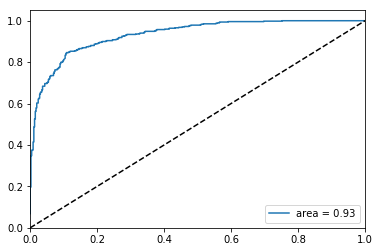

Logistic had an accuracy score of 0.84


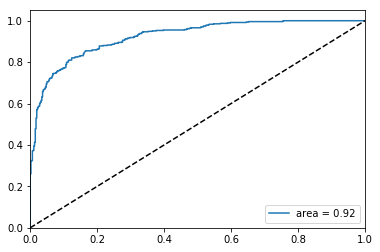

MultinomialNB had an accuracy score of 0.88


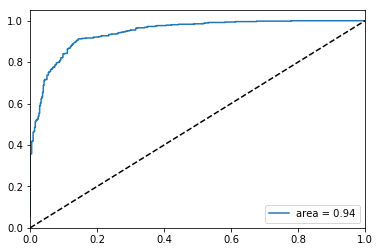

GaussianNB had an accuracy score of 0.76


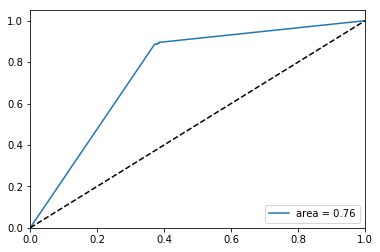

RandomForest3 had an accuracy score of 0.81


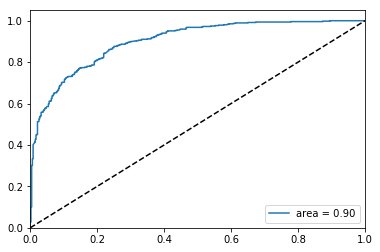

Stochastic GD had an accuracy score of 0.84


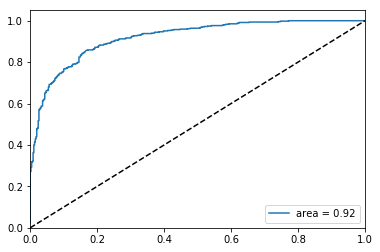

RandomForest1 had an accuracy score of 0.81


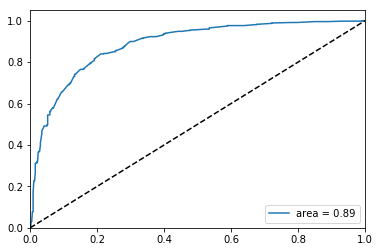

RandomForest2 had an accuracy score of 0.79


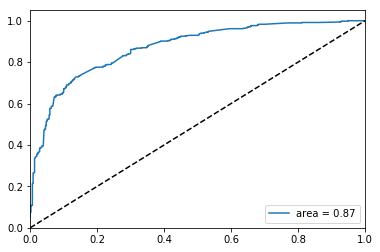

In [88]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

for name, clf in classifiers2.items():
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    score = roc_auc_score(y_test, y_pred)
    print "%s had an accuracy score of %0.2f"% (name, score)
    #Create ROC curve
    pred_probas = clf.predict_proba(X_test)[:,1]

    fpr,tpr,_ = roc_curve(y_test, pred_probas)
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,label='area = %.2f' %roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend(loc='lower right')

    plt.show()

So far, **Multinomial classifier** performed the best as a Sentiment Analyzer with this dataset.

In [89]:
## Try XGBoost as a classifier, just to see how it performs with no parameter tuning
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb = xgb.fit(X_train, y_train)

y_xgb_pred = xgb.predict(X_test)

# find classifier precision
print(classification_report(y_test, y_xgb_pred))

             precision    recall  f1-score   support

          0       0.72      0.90      0.80       460
          1       0.87      0.65      0.75       468

avg / total       0.80      0.78      0.77       928



In [90]:
roc_auc_score(y_test, y_xgb_pred)

0.77694165737643994

## Third attempt
For the third attempt, I attempt to use Word2Vec to see the relationship between the words in the corpus.

In [91]:
import pandas as pd
import numpy as np
import nltk, re
from nltk.corpus import stopwords

In [92]:
# a simpler text preprocessing is used as Word2Vec has some special requirements, to be discussed later.

def review_to_simplewords(raw):
    '''
    simpler text preprocessing
    '''
    # Clean punctuation
    cleantext = raw.replace('/', ' ').replace('-', ' ').replace('."', '.')
    # Remove quotation marks   
    cleaned_text = re.sub(r'^"|"$', '', cleantext)
    # Remove non-letters
    letters = re.sub("[^a-zA-Z]", " ", cleaned_text)
    #return( " ".join(cleaned_text))
    return letters

In [93]:
# as expected, after the simpler preprocessing, each review was minimally 'cleaned'
review_to_simplewords(file1[0])

'    Excellent food  Superb customer service  I miss the mario machines they used to have  but it s still a great place steeped in tradition '

In [94]:
review_to_simplewords(file2[0])

'    Wing sauce is like water  Pretty much a lot of butter and some hot sauce  franks red hot maybe    The whole wings are good size and crispy  but for    a wing the sauce could be better  The hot and extra hot are about the same flavor heat   The fish sandwich is good and is a large portion  sides are decent '

In [95]:
num_pos_reviews = len(file1)
num_neg_reviews = len(file2)

# Clean all positive reviews, status updates
print "Cleaning the set of positive reviews....\n"
# Initialize empty list to hold cleaned positive reviews
clean_pos_reviews = []
for i in xrange(1, num_pos_reviews):
    if ((i+1)%1000 == 0):
        print "Review %d of %d\n" % (i+1, num_pos_reviews)
    clean_pos_reviews.append(review_to_simplewords(file1[i]))

# Clean all negative reviews, status updates
print "Cleaning the set of negative reviews....\n"
# Initialize empty list to hold cleaned negative reviews
clean_neg_reviews = []
for i in xrange(1, num_neg_reviews):
    if ((i+1)%1000 == 0):
        print "Review %d of %d\n" % (i+1, num_neg_reviews)
    clean_neg_reviews.append(review_to_simplewords(file2[i]))

Cleaning the set of positive reviews....

Review 1000 of 2264

Review 2000 of 2264

Cleaning the set of negative reviews....

Review 1000 of 2376

Review 2000 of 2376



In [96]:
# create column headings and tag the positive reviews with sentiment 1
pos_data_df = pd.DataFrame(clean_pos_reviews)
pos_data_df.columns = ["reviews"]
pos_data_df.insert(0, "sentiment", 1)

In [97]:
# create column headings and tag the negative reviews with sentiment 0
neg_data_df = pd.DataFrame(clean_neg_reviews)
neg_data_df.columns = ["reviews"]
neg_data_df.insert(0, "sentiment", 0)

In [98]:
df = pos_data_df.append(neg_data_df)

In [99]:
# check out df

df.head()

,sentiment,reviews
0,1,Yes this place is a little out dated and not o...
1,1,All the food is great here But the best thing...
2,1,The dining area is nice Very family friendly ...
3,1,I highly recommend this place The mechanics a...
4,1,I am a big believer in first impressions so w...


#### First, to train Word2Vec,  it is better Not to remove stop words because Word2Vec needs the broader context of the sentence in order to produce high-quality word vectors. So, stop words removal was made optional . Removal of numbers could be made optional too but this was not carried out.

In [100]:
def review_to_wordlist(review, remove_stopwords=False ):
    # Lower case and split words
    words = review.lower().split()
    # Optionally remove stop words (default=false)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    # Return a list of words
    return(words)

#### Word2Vec expects single sentences, each sentence a list of words. The input format needs to be a list of lists. It is not straightforward how to split a paragraph into sentences. English sentences can end with "?", "!", """, or ".", among other things, so we cannot rely on spacing and capitalization. Use NLTK's punkt tokenizer for sentence splitting to handle this type of splitting.

In [101]:
# Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# Define a function to split a review into sentences
def review_to_sentences(review, tokenizer, remove_stopwords=False):
    # Split a paragraph into sentences using punkt tokenizer
    raw_sentences = tokenizer.tokenize(review.strip())
    # Iterate over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append(review_to_wordlist(raw_sentence, remove_stopwords))
    # Return the list of sentences (a list of lists)
    return sentences

In [103]:
# Start with empty list of sentences
sentences = []

print "Splitting sentences from dataset..."
for review in df["reviews"]:
    sentences += review_to_sentences(review, tokenizer)

Splitting sentences from dataset...


In [104]:
# Check how many sentences we have in total 
print len(sentences)

4635


In [105]:
# How do the sentences look like?
print sentences[0:2]

[['yes', 'this', 'place', 'is', 'a', 'little', 'out', 'dated', 'and', 'not', 'opened', 'on', 'the', 'weekend', 'but', 'other', 'than', 'that', 'the', 'staff', 'is', 'always', 'pleasant', 'and', 'fast', 'to', 'make', 'your', 'order', 'which', 'is', 'always', 'spot', 'on', 'fresh', 'veggies', 'on', 'their', 'hoggies', 'and', 'other', 'food', 'they', 'also', 'have', 'daily', 'specials', 'and', 'ice', 'cream', 'which', 'is', 'really', 'good', 'i', 'had', 'a', 'banana', 'split', 'they', 'piled', 'the', 'toppings', 'on', 'they', 'win', 'pennysaver', 'awards', 'ever', 'years', 'i', 'see', 'why'], ['all', 'the', 'food', 'is', 'great', 'here', 'but', 'the', 'best', 'thing', 'they', 'have', 'is', 'their', 'wings', 'their', 'wings', 'are', 'simply', 'fantastic', 'the', 'wet', 'cajun', 'are', 'by', 'the', 'best', 'most', 'popular', 'i', 'also', 'like', 'the', 'seasoned', 'salt', 'wings', 'wing', 'night', 'is', 'monday', 'wednesday', 'night', 'whole', 'wings']]


In [106]:
print sentences[4624]

['yes', 'for', 'some', 'is', 'not', 'late', 'however', 'we', 'rise', 'with', 'the', 'sun', 'for', 'work', 'during', 'the', 'week', 'so', 'we', 'do', 'the', 'same', 'all', 'weekend']


#### There are a number of parameter choices that affect the run time and the quality of the final model that is produced. See the word2vec API documentation as well as the Google documentation. https://radimrehurek.com/gensim/models/word2vec.html
Architecture: Architecture options are skip-gram (default) or continuous bag of words. Skip-gram could be slightly slower but produced better results.

Training algorithm: Hierarchical softmax (default) or negative sampling. Use default.
Downsampling of frequent words: The Google documentation recommends values between .00001 and .001. Values closer 0.001 used.

Word vector dimensionality: More features result in longer runtimes, and often, but not always, result in better models. Reasonable values are in tens to hundreds; used 500.
Context / window size: How many words of context should the training algorithm take into account? More is better, up to a point. Used 15

Worker threads: Number of parallel processes to run. This is computer-specific, but between 4 and 6 should work on most systems. Just put in but dont think this was used.

Minimum word count: This helps limit the size of the vocabulary to meaningful words. Any word that does not occur at least this many times across all documents is ignored. Reasonable values are between 10 and 100. In this case,
10 was tried. With bigger dataset, might use higher value. Higher values also help limit run time.

In [107]:
# Create the Word2Vec model
# Import the built-in logging module and configure it so that Word2Vec creates nice output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 500    # Word vector dimensionality                      
min_word_count = 10   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

In [108]:
# Initialize and train the model
from gensim.models import word2vec

model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

2017-05-26 23:11:11,783 : INFO : 'pattern' package not found; tag filters are not available for English
2017-05-26 23:11:11,792 : INFO : collecting all words and their counts
2017-05-26 23:11:11,793 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-05-26 23:11:11,847 : INFO : collected 12234 word types from a corpus of 258695 raw words and 4635 sentences
2017-05-26 23:11:11,849 : INFO : Loading a fresh vocabulary
2017-05-26 23:11:11,866 : INFO : min_count=10 retains 2146 unique words (17% of original 12234, drops 10088)
2017-05-26 23:11:11,868 : INFO : min_count=10 leaves 235027 word corpus (90% of original 258695, drops 23668)
2017-05-26 23:11:11,881 : INFO : deleting the raw counts dictionary of 12234 items
2017-05-26 23:11:11,883 : INFO : sample=0.001 downsamples 64 most-common words
2017-05-26 23:11:11,884 : INFO : downsampling leaves estimated 165109 word corpus (70.3% of prior 235027)
2017-05-26 23:11:11,885 : INFO : estimated required memory for 214

In [109]:
# If model is not trained any further, calling init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

2017-05-26 23:12:32,408 : INFO : precomputing L2-norms of word weight vectors


In [110]:
# It can be helpful to create a meaningful model name and save the model for later use.
# Load it later using Word2Vec.load()
model_name = "500features_10minwords_10context"
model.save(model_name)

2017-05-26 23:13:43,604 : INFO : saving Word2Vec object under 500features_10minwords_10context, separately None
2017-05-26 23:13:43,606 : INFO : not storing attribute syn0norm
2017-05-26 23:13:43,607 : INFO : not storing attribute cum_table
2017-05-26 23:13:43,666 : INFO : saved 500features_10minwords_10context


In [111]:
# check out what the model can do
model.doesnt_match("man woman manager restaurant".split())

'restaurant'

In [112]:
model.most_similar(["restaurant"], topn=20)

[('area', 0.9867962002754211),
 ('favorite', 0.980775773525238),
 ('pizza', 0.9783651828765869),
 ('most', 0.9774177074432373),
 ('far', 0.972989559173584),
 ('coffee', 0.9652654528617859),
 ('store', 0.964682400226593),
 ('lacking', 0.9630944728851318),
 ('thing', 0.9613078832626343),
 ('best', 0.95880126953125),
 ('horrible', 0.9579665660858154),
 ('in', 0.9577596187591553),
 ('absolute', 0.9534685015678406),
 ('city', 0.9531123042106628),
 ('experience', 0.9491274356842041),
 ('restaurants', 0.9480255842208862),
 ('neighborhood', 0.9480214715003967),
 ('has', 0.9478422403335571),
 ('terrible', 0.9473357796669006),
 ('amazing', 0.9469539523124695)]

In [113]:
model.most_similar(["bad"], topn=20)

[('authority', 0.9820827841758728),
 ('s', 0.9812295436859131),
 ('than', 0.9756234288215637),
 ('mcdonald', 0.9720402359962463),
 ('customer', 0.9700397849082947),
 ('quality', 0.9700223207473755),
 ('expensive', 0.9676067233085632),
 ('only', 0.9674880504608154),
 ('pretty', 0.9662005305290222),
 ('incompetent', 0.9657585024833679),
 ('really', 0.9646981358528137),
 ('places', 0.9634782671928406),
 ('worth', 0.9632484912872314),
 ('other', 0.9613924026489258),
 ('always', 0.9598172903060913),
 ('too', 0.9589921236038208),
 ('store', 0.9588463306427002),
 ('value', 0.9583055973052979),
 ('shop', 0.9570320248603821),
 ('fast', 0.9562820196151733)]

In [114]:
# Load the model that was created 
from gensim.models import Word2Vec
model = Word2Vec.load("500features_10minwords_10context")

2017-05-26 23:15:09,218 : INFO : loading Word2Vec object from 500features_10minwords_10context
2017-05-26 23:15:09,237 : INFO : loading wv recursively from 500features_10minwords_10context.wv.* with mmap=None
2017-05-26 23:15:09,238 : INFO : setting ignored attribute syn0norm to None
2017-05-26 23:15:09,239 : INFO : setting ignored attribute cum_table to None
2017-05-26 23:15:09,240 : INFO : loaded 500features_10minwords_10context


In [115]:
type(model.wv.syn0)

numpy.ndarray

In [116]:
model.wv.syn0.shape

(2146, 500)

In [117]:
# Create the training and testing sets manually
train_pos_df = pos_data_df[:len(pos_data_df)*4/5]
train_neg_df = neg_data_df[:len(neg_data_df)*4/5]

train = train_pos_df.append(train_neg_df)

test_pos_df = pos_data_df[len(pos_data_df)*4/5:]
test_neg_df = neg_data_df[len(neg_data_df)*4/5:]

test= test_pos_df.append(test_neg_df)

Credit to Kaggle for the part below. Word2Vec creates clusters of semantically related words, so we can use the similarity of words within a cluster. Grouping vectors in this way is known as "vector quantization." To do this, first find the centers of the word clusters,  using a clustering algorithm such as K-Means. In K-Means, we need to set the number of clusters; the parameter "K". Small clusters, with an average of only 5 words or so per cluster, might better results than large clusters with many words. scikit-learn is used to perform K-Means.

In [119]:
from sklearn.cluster import KMeans
import time
# Find out how much time it takes to train the model
start = time.time() # Start time

# Set "k" (num_clusters) to be 1/5th of the vocabulary size, or an average of 5 words per cluster
word_vec = model.wv.syn0
num_clusters = word_vec.shape[0] / 5

# Initalize a k-means object and use it to extract centroids
km_clustering = KMeans(n_clusters = num_clusters)
idx = km_clustering.fit_predict(word_vec)

# Get the end time and print how long the process took
end = time.time()
time_taken = end - start
print "Time taken for K-Means clustering: ", time_taken, "seconds."

Time taken for K-Means clustering:  8.1411960125 seconds.


In [120]:
# Create a Word dictionary by mapping vocabulary word to the cluster number                                                                                            
word_centroid_map = dict(zip(model.wv.index2word, idx))

# Find out what is in the first 15 clusters

for cluster in xrange(0,15):
    #
    # Print the cluster number  
    print "\nCluster %d" % cluster
    #
    # Print all words in a certain cluster
    words = []
    for i in xrange(0,len(word_centroid_map.values())):
        if(word_centroid_map.values()[i] == cluster ):
            words.append(word_centroid_map.keys()[i])
    print words


Cluster 0
['city', 'neighborhood', 'terrible', 'horrible']

Cluster 1
['talking', 'gift', 'promised', 'tim', 'alone', 'eyes', 'polish', 'quote', 'person', 'bouquet', 'calling', 'brand', 'walters']

Cluster 2
['so']

Cluster 3
['nachos', 'quaint', 'disgusting', 'acceptable', 'olive', 'edible', 'cute', 'efficient', 'tea', 'section', 'huge', 'goods', 'similar', 'thin', 'wonderful', 'vibe', 'located', 'priced']

Cluster 4
['clothes', 'bomb', 'pharmacy', 'post', 'heat', 'effort', 'typical', 'pop', 'comfort', 'authentic', 'hell', 'starbucks', 'heavy', 'classes', 'specialty', 'involved', 'animals', 'system', 'volunteer', 'candy']

Cluster 5
['savory', 'fabulous', 'smoked', 'sour', 'ravioli', 'spicy', 'ricotta']

Cluster 6
['asked', 'her']

Cluster 7
['now']

Cluster 8
['waited']

Cluster 9
['round', 'girl', 'explaining', 'finished', 'placed']

Cluster 10
['work', 'figure', 'normal', 'pay', 'help', 'allow']

Cluster 11
['what']

Cluster 12
['is']

Cluster 13
['worth']

Cluster 14
['pineapple'

There is a cluster (or "centroid") assignment for each word, and we can define a function to convert reviews into bags-of-centroids. This works just like Bag of Words but uses semantically related clusters instead of individual words.
The function below will give a numpy array for each review, each with a number of features equal to the number of clusters. Finally, we create bags of centroids for our training and test set, then train classifiers and find out 
how the classifiers fare in terms of accuracy.

In [121]:
def create_bag_of_centroids(wordlist, word_centroid_map):
    #
    # The number of clusters is equal to the highest cluster index
    # in the word / centroid map
    num_centroids = max(word_centroid_map.values()) + 1
    #
    # Pre-allocate the bag of centroids vector (for speed)
    bag_of_centroids = np.zeros(num_centroids, dtype="float32")
    #
    # Iterate the words in the review. If the word is in the vocabulary,
    # find which cluster it belongs to, and increment that cluster count 
    # by one
    for word in wordlist:
        if word in word_centroid_map:
            index = word_centroid_map[word]
            bag_of_centroids[index] += 1
    #
    # Return the "bag of centroids"
    return bag_of_centroids

In [122]:
# Pre-allocate an array for the training set bags of centroids (for speed)
train_centroids = np.zeros( (train["reviews"].size, num_clusters), dtype="float32")

clean_train_reviews = []
for review in train["reviews"]:
    clean_train_reviews.append(review_to_wordlist(review, remove_stopwords=True))

clean_test_reviews = []
for review in test["reviews"]:
    clean_test_reviews.append(review_to_wordlist(review, remove_stopwords=True))

# Transform the training set reviews into bags of centroids
counter = 0
for review in clean_train_reviews:
    train_centroids[counter] = create_bag_of_centroids(review, word_centroid_map)
    counter += 1

# Repeat for test reviews 
test_centroids = np.zeros((test["reviews"].size, num_clusters), dtype="float32")

counter = 0
for review in clean_test_reviews:
    test_centroids[counter] = create_bag_of_centroids(review, word_centroid_map)
    counter += 1

In [123]:
# Fit a random forest and extract predictions 
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 85, max_depth = 75)

# Fitting the forest
print "Using a random forest for train data"
forest = forest.fit(train_centroids,train["sentiment"])
y_forest_pred = forest.predict(test_centroids)

from sklearn.metrics import roc_auc_score
roc_auc_score(test["sentiment"], y_forest_pred)

Using a random forest for train data


0.7307075636110143

In [124]:
from sklearn.metrics import classification_report
print(classification_report(test["sentiment"], y_forest_pred))

             precision    recall  f1-score   support

          0       0.74      0.73      0.73       475
          1       0.72      0.74      0.73       453

avg / total       0.73      0.73      0.73       928



In [126]:
# Fitting a MultinomialNB
print "Using a MultinomialNB for train data"
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb = mnb.fit(train_centroids,train["sentiment"])
y_mnb_pred = mnb.predict(test_centroids)

roc_auc_score(test["sentiment"], y_mnb_pred)

Using a MultinomialNB for train data


0.75290577436969908

In [127]:
# find classifier precision
print(classification_report(test["sentiment"], y_mnb_pred))

             precision    recall  f1-score   support

          0       0.81      0.68      0.74       475
          1       0.71      0.83      0.77       453

avg / total       0.76      0.75      0.75       928



Compared to not using the Word2Vec and just applying the MutlinomialNB model, the MNB model with W2V performed worse. This could be the dataset used, the parameters used in the W2V model.

Next steps: Tweaking the parameters of the word2vec model. Explore putting the word2vec model into a Recurrent Neural Network to see if the accuracy of predictions can be improved. A bigger dataset could also be used and parameters tweaked in the model with a bigger dataset to see if the model fares better.